# Sistema de 2do Orden
---
Dado el siguiente sistema:

                                 +-----------------------+
                                 |            2          | 
      R(s) (+) /¨¨¨\    E(s)     |         w_n           |           Y(s)
    --------->|     |----->------|   __________________  |-----*------>
               \__ /             |   s ( s + 2*xi*w_n )  |     |
                 ^ (-)           +-----------------------+     |
                 |                        G(s)                 |
                 |                                             |
                 +---------------------------------------------+

se quiere encontrar:

- La transferencia $\frac{Y(s)}{R(s)}$
- La respuesta al escalón.
- tr: tiempo de rise time.
- yp: valor del pico.
- ts: tiempo de establecimiento

### Los cálculos manuales dan:

  $$ \frac{Y}{R}(s) = \frac{G(s)}{1 + G(s)} $$
  $$ \frac{Y}{R}(s) = \frac{\omega_n^2}{s^2 + 2s \xi \omega_n + \omega_n^2} $$

In [46]:
clc, clear all, close all
pkg load symbolic control signal

syms omega_n;
syms xi;
syms s

% Transferencia generica
G = (omega_n^2)/(s^2+2*xi*omega_n*s);
H = simplify(G/(1+G))

Symbolic pkg v2.9.0: Python communication link active, SymPy v1.5.1.
H = (sym)

            2        
          ωₙ         
  ───────────────────
    2               2
  ωₙ  + 2⋅ωₙ⋅s⋅ξ + s 



### Polos:

$0 < \xi < 1$:
  $$ p_1 = - \xi \, \omega_n + \omega_n \sqrt{1 - \xi^2} $$
  $$ p_2 = - \xi \, \omega_n - \omega_n \sqrt{1 - \xi^2} $$
  
definiendo $\sigma_d = \xi \, \omega_n$ ; $\omega_d = \omega_n \sqrt{1 - \xi^2}$ :

  $$ p_1 = - \sigma_d + \omega_d $$
  $$ p_2 = - \sigma_d - \omega_d $$

### Relaciones trigonométricas:

   $$ \tan(\beta) = \sqrt{\frac{1}{\xi^2} - 1} $$
   $$ \cos(\beta) = \xi $$
   $$ \sin(\beta) = \sqrt{1 - \xi^2} $$

### Respuesta al escalón:

  $$ y(t) = 1 + \frac{e^{-\sigma_d t}}{\sqrt{1 - \xi^2}} \sin \left( {\omega_d t - (\pi - \beta)} \right) $$


Transfer function 'H' from input 'u1' to output ...

             400 s^2 + 4800 s        
 y1:  -------------------------------
      s^4 + 24 s^3 + 544 s^2 + 4800 s

Continuous-time model.


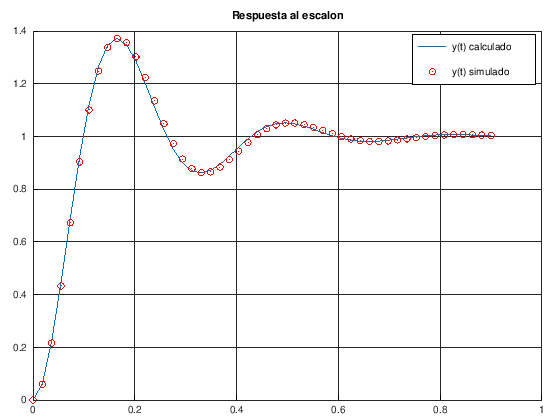

In [59]:
%% Ahora necesito darle valores el resultado numerico
% elijo omega_n y xi
omega_n = 20;
xi = 0.3;
% definiciones
sigma_d = xi*omega_n;
omega_d = omega_n * sqrt( 1 - xi^2 );
beta = acos (xi);

% Defino la transferencia H
s = tf('s');
G = (omega_n^2)/(s^2+2*xi*omega_n*s);
H = G/(1+G)

% Grafico la respuesta al escalon
[y_simulado, t, X] = step(H);
y_calculado = 1 + ( e.^(-sigma_d.*t)./sqrt( 1 - xi^2 ) ) .* sin ( omega_d.*t - pi + beta );

hold on
plot(t, y_calculado)
plot(t, y_simulado,'ro')
title('Respuesta al escalon');
legend('y(t) calculado', 'y(t) simulado');
grid
hold off

### tr, magnitud del pico, ts:

  $$ t_r = \frac{\pi}{\omega_d} $$
magnitud del pico:
  $$ y(t_r) = 1 + e^{-\frac{\pi \xi}{ \sqrt{1 - \xi^2}}} $$
  
ts (aproximado):
  $$ t_s = \frac{4}{\sigma_d} $$

In [60]:
% magnitud del pico
[mag_pico_simulado, idx_tr] = max(y_simulado);
mag_pico_simulado 
mag_pico_calculado = 1 + e^( ( -pi*xi)/sqrt( 1 - xi^2) )

mag_pico_simulado =  1.3718
mag_pico_calculado =  1.3723


In [61]:
% tr
tr_simulado = t(idx_tr)
tr_calculado = pi/omega_d

tr_simulado =  0.16531
tr_calculado =  0.16466


In [108]:
%ts 

%Datos
A = 1;
tolerancia = A*0.005; % 1%

% Calculo a partir del vector simulado
t_idx = 1;
LEN_Y = length(y_simulado);
do
    y_1_porc = abs(A - y_simulado(t_idx));
    y_derivada = abs(y_simulado(t_idx+1)) - abs(y_simulado(t_idx));
   t_idx ++;
until( (y_1_porc < tolerancia & y_derivada < 0) | ( t_idx >= (LEN_Y - 1) ) )

% Muestro el resultado
if (t_idx < LEN_Y-2)
    ts_simulado = t(t_idx)
else
    printf("No se encontró el ts al 1 porciento  en esta simulación \n")
endif
ts_calculado = 4/sigma_d
    

ts_simulado =  0.62449
ts_calculado =  0.66667
